In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 383.5, 287.5, -0.5)

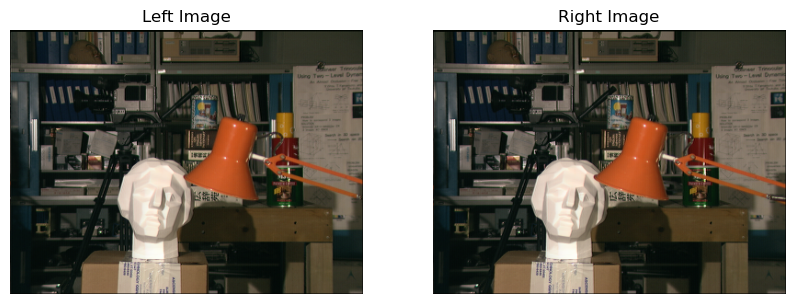

In [11]:
left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB))
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
plt.title('Right Image')
plt.axis('off')


In [12]:
def l1_distance(x, y):
    return abs(x - y)

def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    left = cv2.imread(left_img, 0).astype(np.float32)
    right = cv2.imread(right_img, 0).astype(np.float32)

    height, width = left.shape[:2]

    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255
    
    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value if (x-j) < 0 else l1_distance(int(left[y, x]), int(right[y, x-j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity + scale
    
    if save_result == True:
        print('Saving result...')

        cv2.imwrite('pixel_wire_l1.png', depth)
        cv2.imwrite('pixel_wise_l1_color.png', cv2.applyColorMap(depth , cv2.COLORMAP_JET))

    print('Done')

    return depth

Saving result...
Done


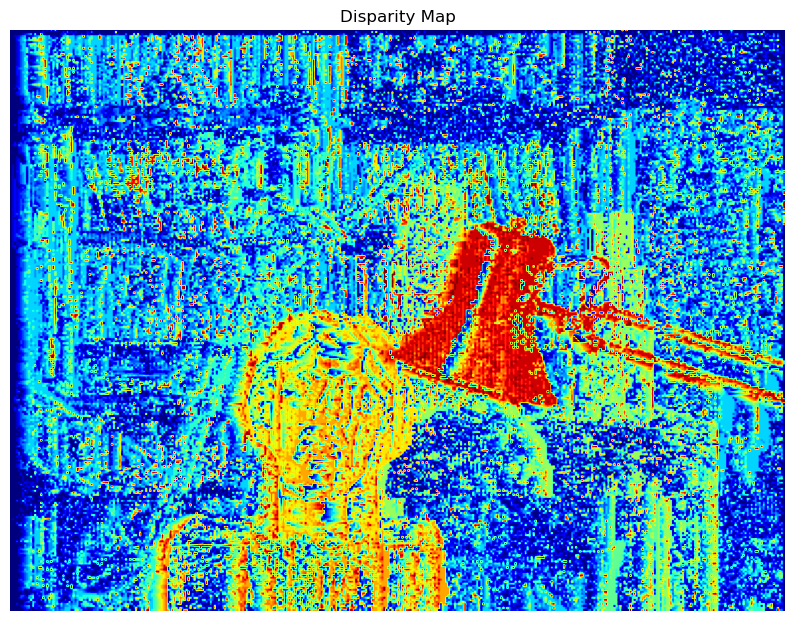

In [13]:
# L1 result
depth = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

plt.figure(figsize=(10, 10))
plt.imshow(depth, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')
plt.show()


In [21]:
def l2_distance(x, y):
    return (x - y) ** 2
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result=True):
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255 ** 2

    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l2.png', depth)
        cv2.imwrite(f'pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')

    return depth

Saving result...
Done


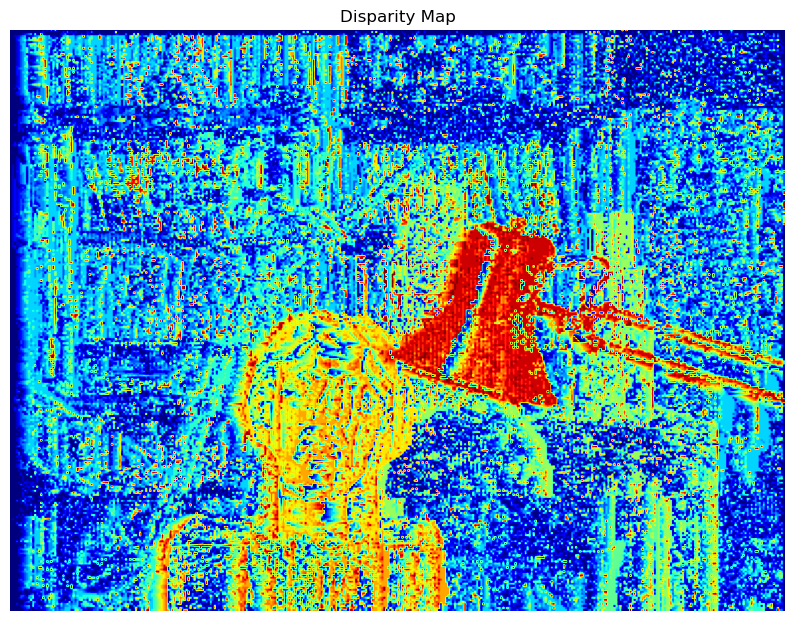

In [22]:
# L2 result
depth = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

plt.figure(figsize=(10, 10))
plt.imshow(depth, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')
plt.show()
